In this notebook,our goal is to study the BCM related objective function and local learning rule on various datasets.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
import pandas as pd
import BCM
import data_loader
% matplotlib inline

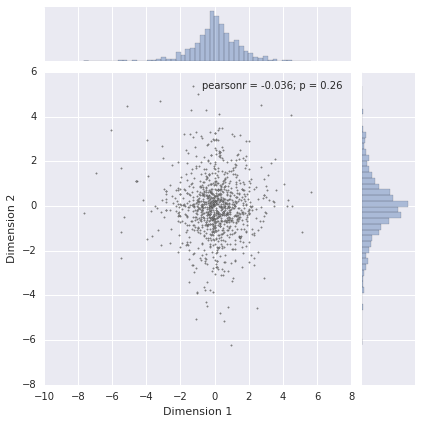

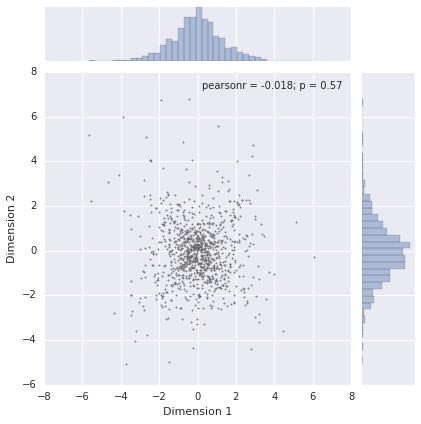

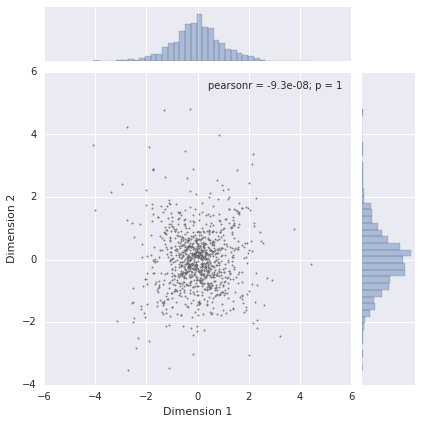

In [14]:
# Load laplace data with 45 degree rotation
Laplace_rt_wt,Laplace_w = data_loader.load_laplace(loc = 0, scale = 1, sample_size = 1000,dimension = 2,skew = False, whiten = True, rotation = True)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


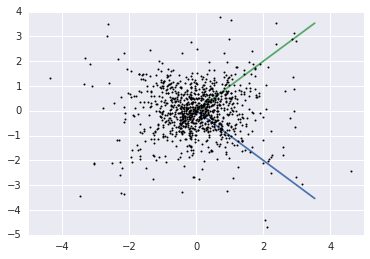

In [4]:
# Check orignal dimension
print(Laplace_w)
plt.figure()
w_tmp = Laplace_w
w_tmp = w_tmp * 5
plt.plot([0,w_tmp[0][0]],[0,w_tmp[0][1]])
plt.plot([0,w_tmp[1][0]],[0,w_tmp[1][1]])
plt.plot(Laplace_rt_wt[:,0],Laplace_rt_wt[:,1],'.k', ms=4)

In [ ]:
# Train BCM model with Laplace data

ny = 2    # 2 output neurons
p = 2
tau = 200
batch = 1

# nonlinear = 'Relu'
# obj_type = 'QBCM'
# n_epoch = 40
# decay = 0.05
# eta = 0.0005

# nonlinear = 'Sigmoid'
# obj_type = 'QBCM'
# n_epoch = 200
# decay = 0.005
# eta = 0.005

# nonlinear = None
# obj_type = 'QBCM'
# n_epoch = 40
# decay = 0.05
# eta = 0.0005

# nonlinear = 'Relu'
# obj_type = 'kurtosis'
# eta = 0.00005
# n_epoch = 40
# decay = 0.05

# nonlinear = 'Sigmoid'
# obj_type = 'kurtosis'
# eta = 0.01
# n_epoch = 200
# decay = 0.05

# nonlinear = None
# obj_type = 'kurtosis'
# eta = 0.0005
# n_epoch = 40
# decay = 0.05

BCM_laplace = BCM.bcm_train(Laplace_rt_wt,eta = eta, n_epoch = n_epoch, batch = batch , ny = ny,tau = tau, thres = 0, p = p,random_state = None, shuffle = True, nonlinear = nonlinear, obj_type = obj_type,decay = decay)

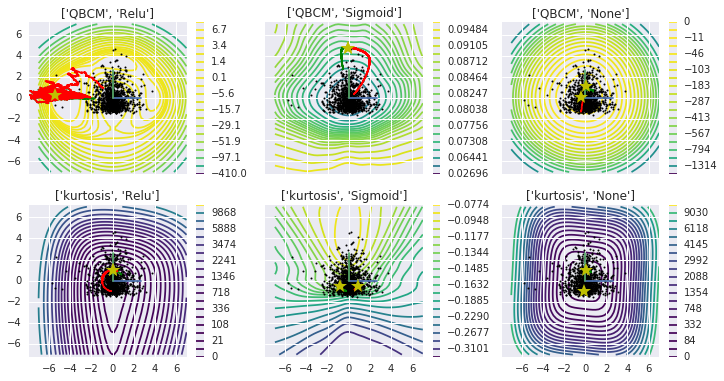

In [19]:
# Contruct objective function and 2D contour 
# Track the weight update trajectory
# Plot the trained weights on top
# Generate the objective function landscape

w_min = -7
w_max = 7
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

n_epoch = np.array([40,400,200,100,100,200])
decay = np.array([0.01,0.01,0.05,0.05,0.05,0.05])
eta = np.array([0.0005,0.01,0.001,0.0005,0.00005,0.01])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Laplace_rt_wt,w_min,w_max,reso,para,ori_w = Laplace_w)

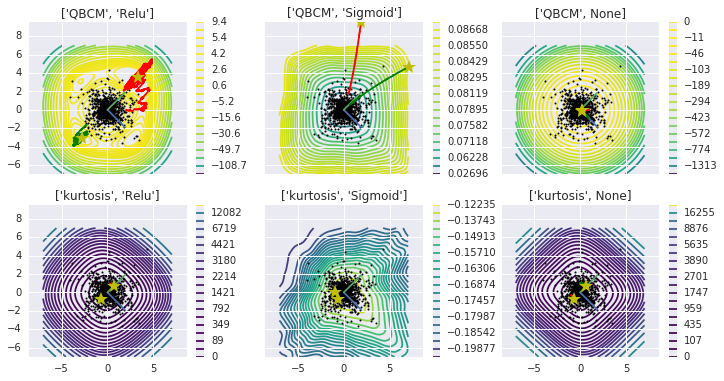

In [97]:
# Contruct objective function and 2D contour 
# Track the weight update trajectory
# Plot the trained weights on top
# Generate the objective function landscape

w_min = -7
w_max = 7
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

n_epoch = np.array([40,2                                                                0,40,200,200,200])
decay = np.zeros(6)
eta = np.array([0.0005,0.005,0.0005,0.0005,0.00005,0.01])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Laplace_rt_wt,w_min,w_max,reso,para,ori_w = Laplace_w)

[[ 1.  0.]
 [ 0.  1.]]


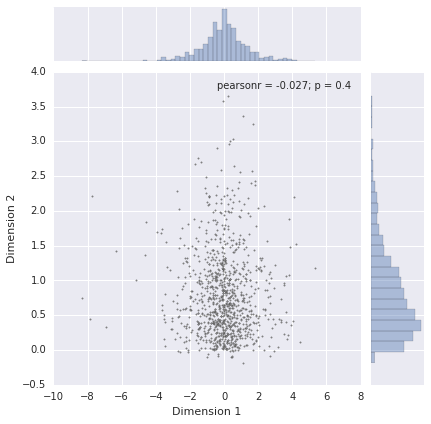

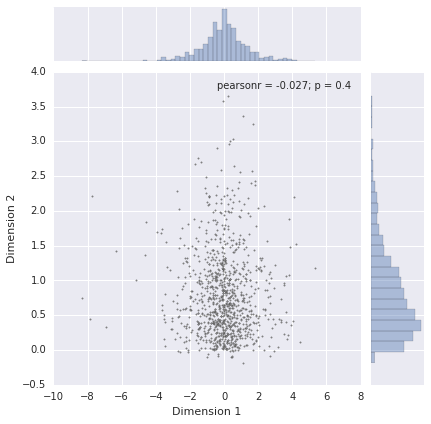

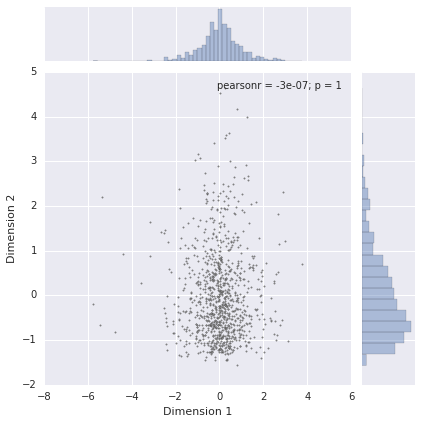

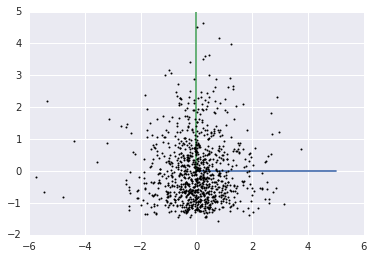

In [16]:
# Load laplace data with 45 degree rotation
Laplace_rt_wt,Laplace_w = data_loader.load_laplace(loc = 0, scale = 1, sample_size = 1000,dimension = 2,skew = True, whiten = True, rotation = False, Affine = False)
# Check orignal dimension
print(Laplace_w)
plt.figure()
w_tmp = Laplace_w
w_tmp = w_tmp * 5
plt.plot([0,w_tmp[0][0]],[0,w_tmp[0][1]])
plt.plot([0,w_tmp[1][0]],[0,w_tmp[1][1]])
plt.plot(Laplace_rt_wt[:,0],Laplace_rt_wt[:,1],'.k', ms=4)

done in 52.230s


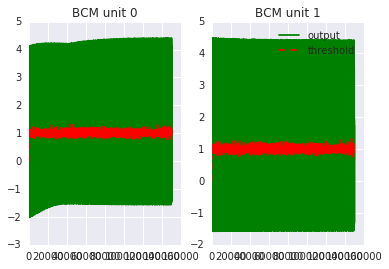

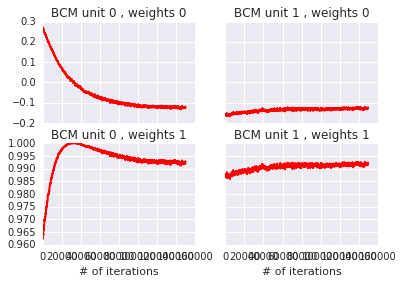

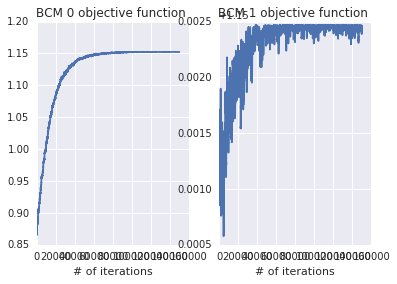

In [89]:
# Train BCM model with Skewed laplace data

ny = 2    # 2 output neurons
p = 2
tau = 200
batch = 1

# nonlinear = 'Relu'
# obj_type = 'QBCM'
# n_epoch = 200
# decay = 0.005
# eta = 0.00005

# nonlinear = 'Sigmoid'
# obj_type = 'QBCM'
# n_epoch = 200
# decay = 0.0005
# eta = 0.005

# nonlinear = None
# obj_type = 'QBCM'
# n_epoch = 40
# decay = 0.005
# eta = 0.0005

# nonlinear = 'Relu'
# obj_type = 'kurtosis'
# n_epoch = 40
# decay = 0.05
# eta = 0.00005

# nonlinear = 'Sigmoid'
# obj_type = 'kurtosis'
# n_epoch = 40
# decay = 0.05
# eta = 0.05

nonlinear = None
obj_type = 'kurtosis'
n_epoch = 150
decay = 0.05
eta = 0.00001


BCM_laplace = BCM.bcm_train(Laplace_rt_wt,eta = eta, n_epoch = n_epoch, batch = batch , ny = ny,tau = tau, thres = 0, p = p,random_state = None, shuffle = True, nonlinear = nonlinear, obj_type = obj_type,decay = decay)

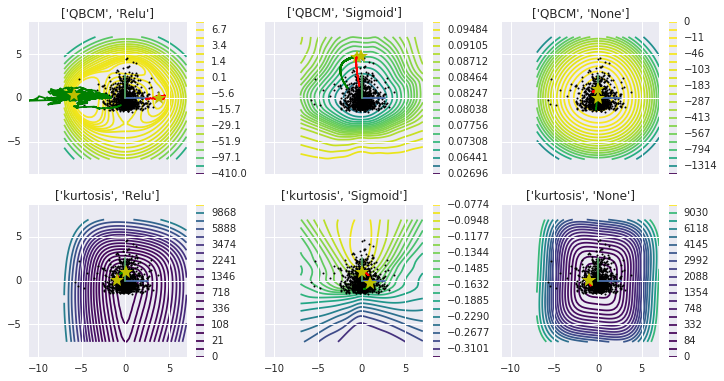

In [17]:
# Objective function landscape and training results for skewed data

w_min = -7
w_max = 7
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

# n_epoch = np.array([200,400,100,100,100,150])
# # decay = np.array([0.5,0.005,0.005,0.05,0.05,0.05])
# decay = np.array([0.005,0.01,0.005,0.00005,0.05,0.05])
# eta = np.array([0.0005,0.005,0.0005,0.00005,0.05,0.00001])

n_epoch = np.array([40,400,200,400,400,400])
decay = np.array([0.01,0.01,0.05,0.05,0.05,0.005])
eta = np.array([0.0005,0.005,0.001,0.0005,0.00005,0.01])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Laplace_rt_wt,w_min,w_max,reso,para,obj_select = None, nonlinear_select = None, ori_w = Laplace_w)

In [ ]:
# Objective function landscape and training results for skewed data

w_min = -7
w_max = 7
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

n_epoch = np.array([200,40,100,100,100,150])
decay = np.zeros(6)
eta = np.array([0.0005,0.005,0.0005,0.00005,0.05,0.00001])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Laplace_rt_wt,w_min,w_max,reso,para,obj_select = 'kurtosis', nonlinear_select = 'None', ori_w = Laplace_w)

In [23]:
a = ['abc','123','a13']
a.index('abc')

0

In [10]:
% debug

> /notebooks/NNDL_Shuang/BCM.py(291)bcm_obj()
    289                 c = ax[i,j].contour(wx,wy,obj_landscape.reshape(wx.shape),levels=levels, zorder=-10, cmap=plt.cm.get_cmap('viridis'))
    290                 ax[i,j].plot(s_rt_wt[:,0],s_rt_wt[:,1],'.k', ms=4)
--> 291                 ax[i,j].set_aspect(1)
    292 
    293             plt.grid('on')

ipdb> i
0
ipdb> j
0
ipdb> exit


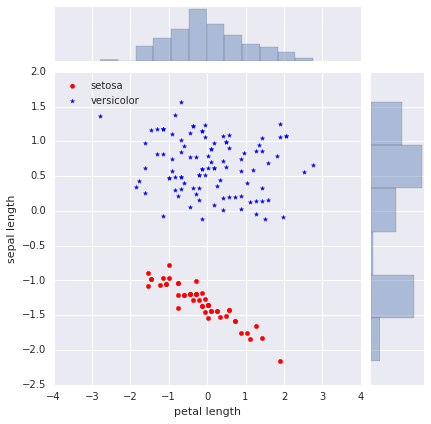

In [48]:
# Load Iris data
Iris_rt_wt = data_loader.load_Iris()

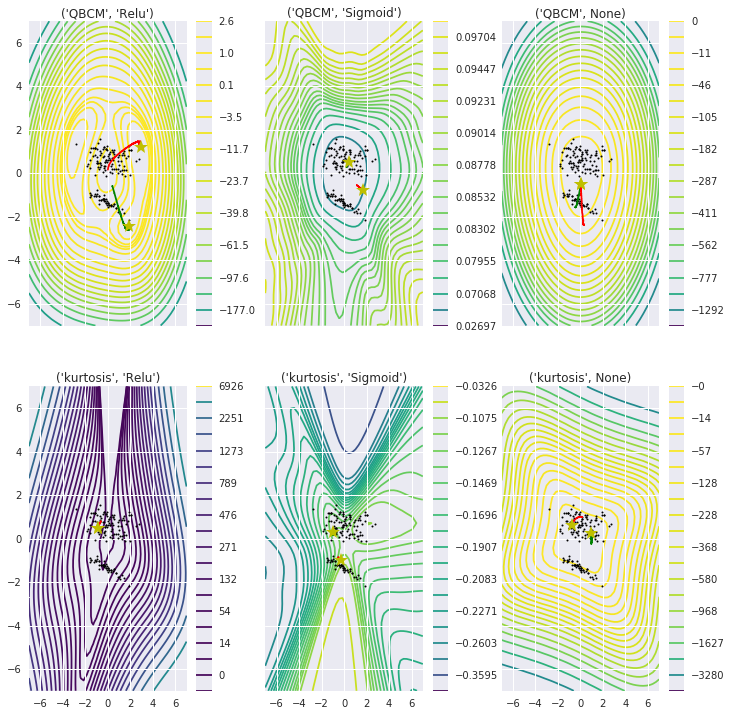

In [51]:
# plot the objective function and training trajectory with Iris data

w_min = -7
w_max = 7
reso = 50

ny = 2    # 2 output neurons
n_epoch = 200
p = 2
eta = 0.0005
tau = 200
batch = 1
decay = 0

para = [ny,n_epoch,p,eta,tau,batch,decay]

BCM.bcm_obj(Iris_rt_wt,w_min,w_max,reso,para)